# Abalone

Predict the age of abalone from physical measurements

Dataset Characteristics
Tabular

Subject Area
Biology

Associated Tasks
Classification, Regression

Feature Type
Categorical, Integer, Real

Instances
4177

Features
8

## Additional Information

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

![Alt Text](img2.jpg)

In [ ]:
#pip install ucimlrepo

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [8]:
X

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550  
4             0.0395        0.0550  
...              ...           ...  
4172          0.2390        0.2490  
4173          0.2145        0.2605  
4174          0.2875        0.3080  
4175          0.2610        0.2960  
4176          0.3765        0.4950  

[4177 rows x 8 columns]

In [9]:
dataset = pd.merge(X,y,right_index=True,left_index=True)
dataset.head(10)

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
5         0.120      8  
6         0.330     20  
7         0.260     16  
8         0.165      9  
9         0.320     19

In [10]:
dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

<Axes: xlabel='Rings'>

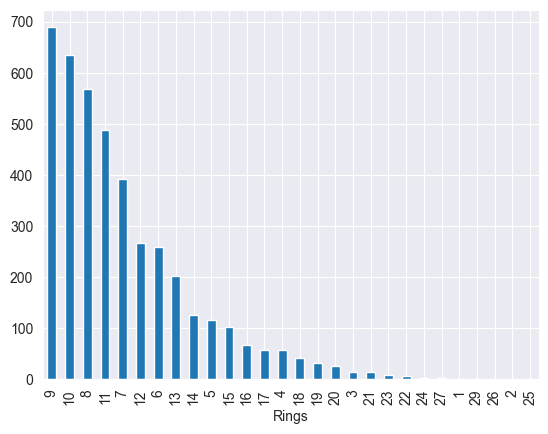

In [11]:
dataset['Rings'].value_counts().plot.bar()

In [12]:
classes_to_group = [9,10,8,11,7,12,6,13]
dataset['Rings'] = np.where(dataset['Rings'].isin(classes_to_group), dataset['Rings'], 'other')

In [13]:
dataset['Rings'].value_counts()

Rings
9        689
other    679
10       634
8        568
11       487
7        391
12       267
6        259
13       203
Name: count, dtype: int64

In [14]:
dataset.describe()

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight  
count     4177.000000   4177.000000  
mean         0.180594      0.238831  
std          0.109614      0.139203  
min          0.000500      0.001500  
25%          0.093500      0.130000  
50%          0.171000      0.234000  
75%          0.253000      0.329000  
max          0.760000      1.005000

## Data Preparation and Visualisation

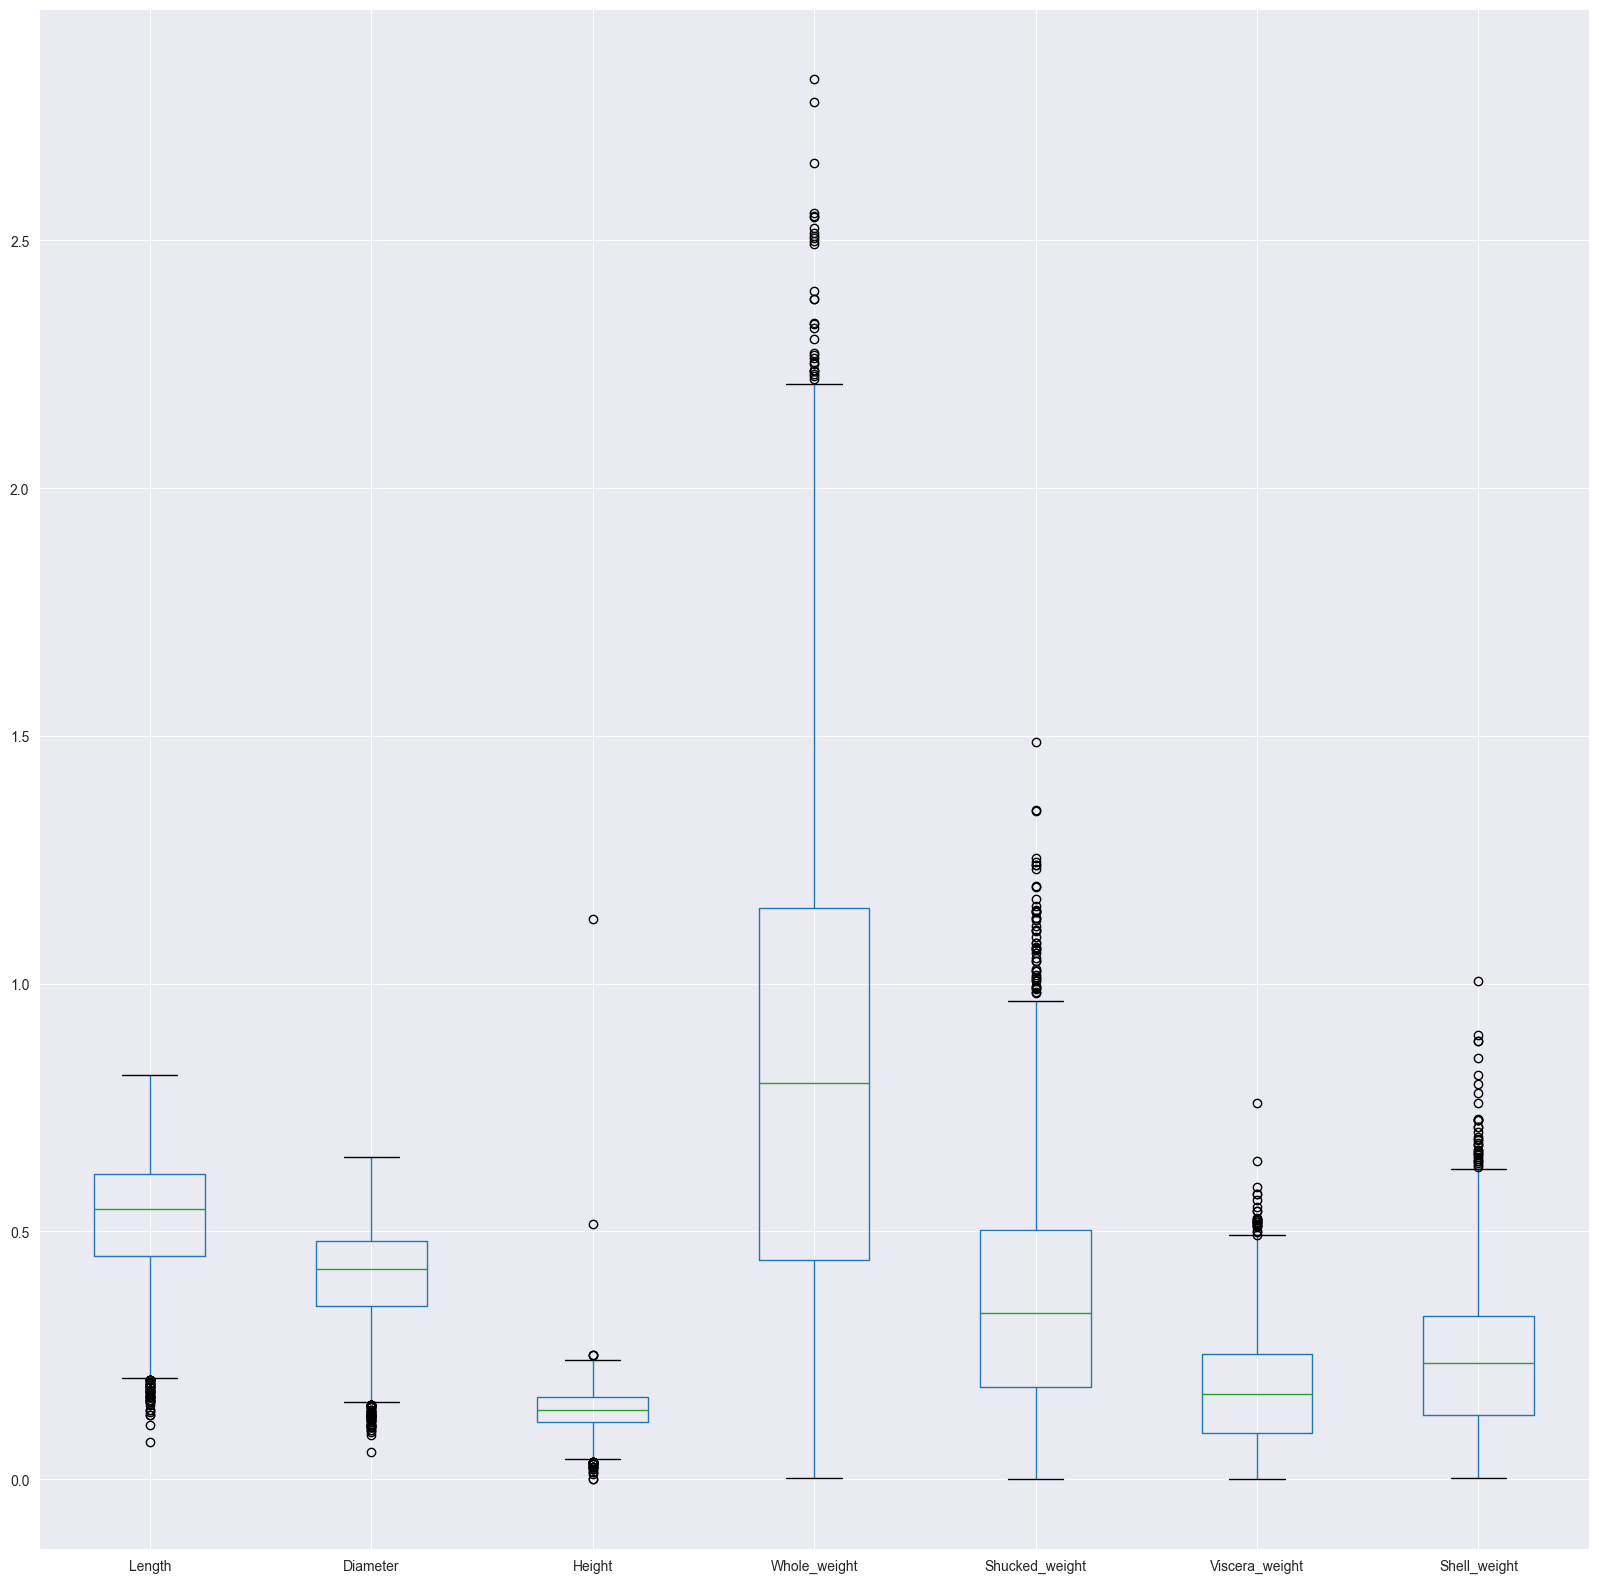

In [20]:
plt.figure(figsize=(20,20))
dataset.boxplot()
plt.show()

In [21]:
unique_classes = dataset['Rings'].unique()

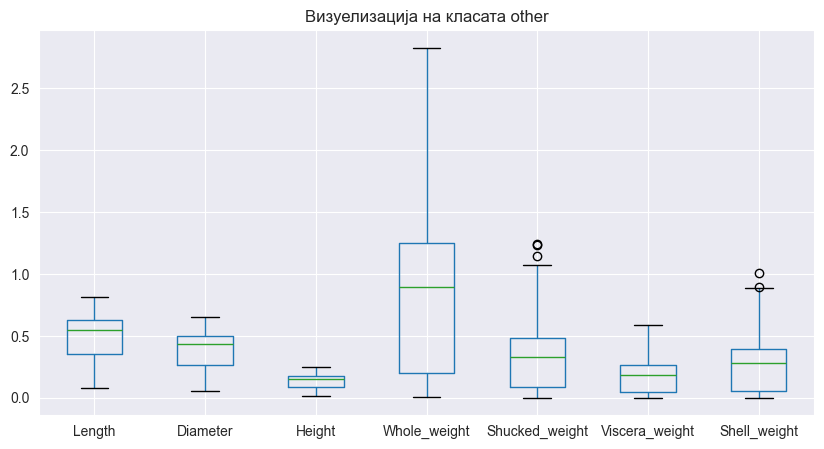

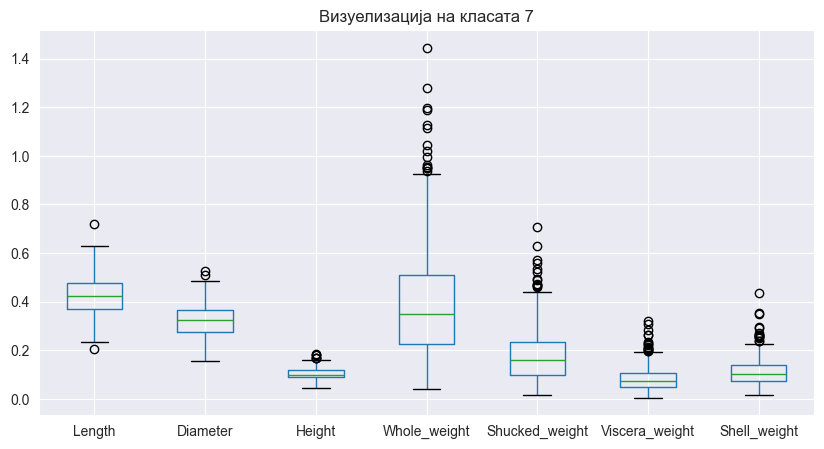

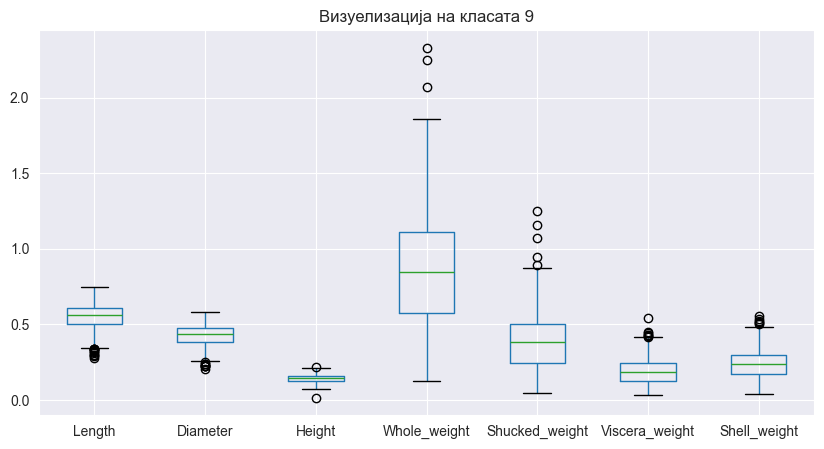

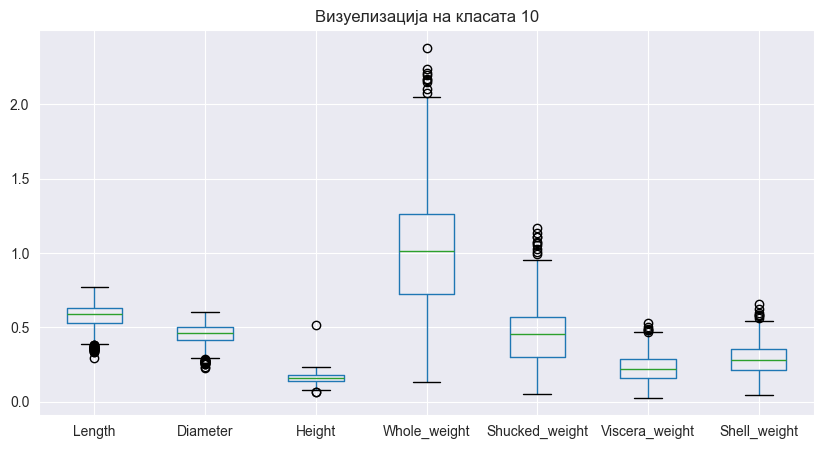

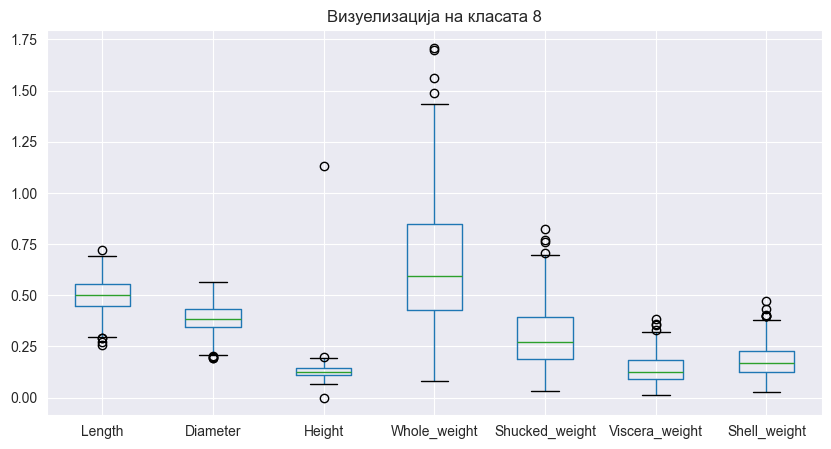

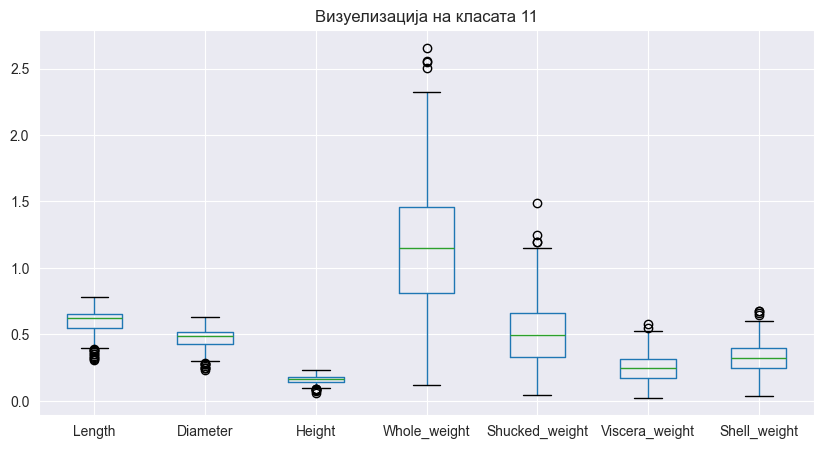

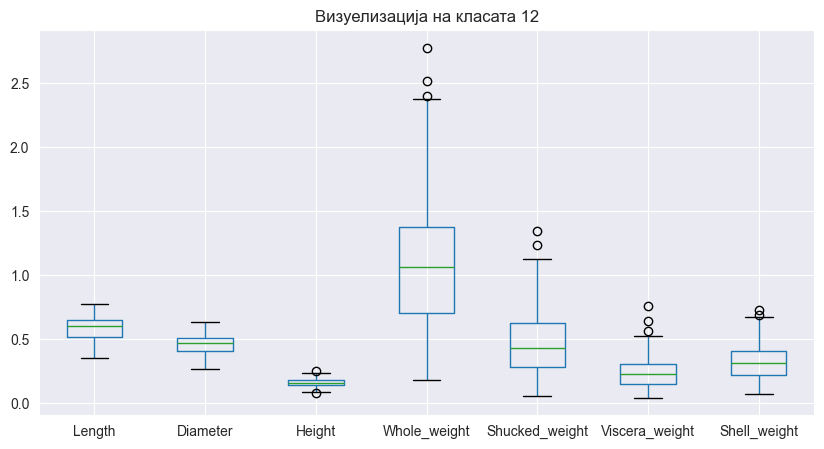

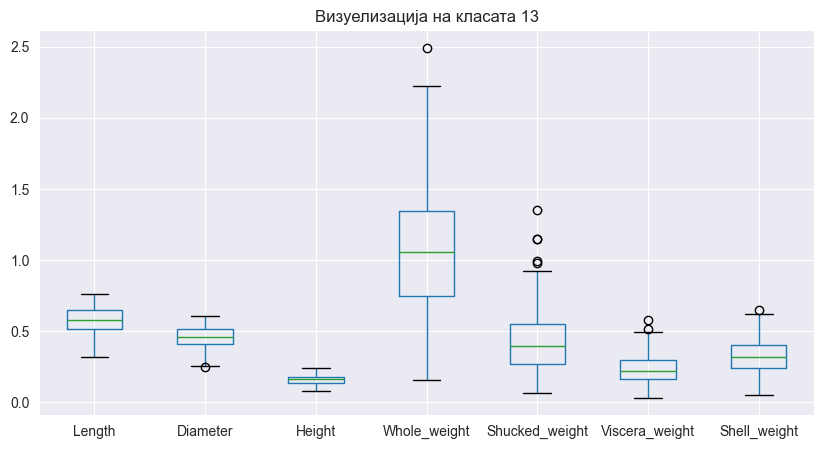

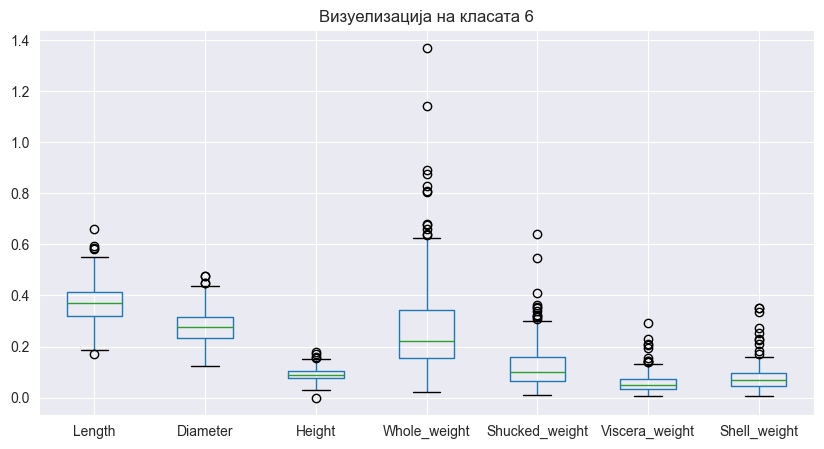

In [25]:
for elem in unique_classes:
  plt.figure(figsize=(10,5))
  dataset[dataset.Rings==elem].drop(columns='Rings',axis=1).boxplot()
  plt.title(f'Визуелизација на класата {elem}')
  plt.show()


Заклучок: Бидејќи outlier-те во овој случај само  kaj атрибутот 'Whole_weight' отстапува премногу од интервалот следува дека ќе се направи  отфрлање на оние податоци каде овој атрибут отстапува од интервалот на доверба.

In [27]:
Q1 = dataset['Whole_weight'].quantile(0.25)
Q3 = dataset['Whole_weight'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
dataset = dataset[(dataset['Whole_weight'] >= lower) & (dataset['Whole_weight'] <= upper)]
dataset

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500  other  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4147 rows x 9 columns]

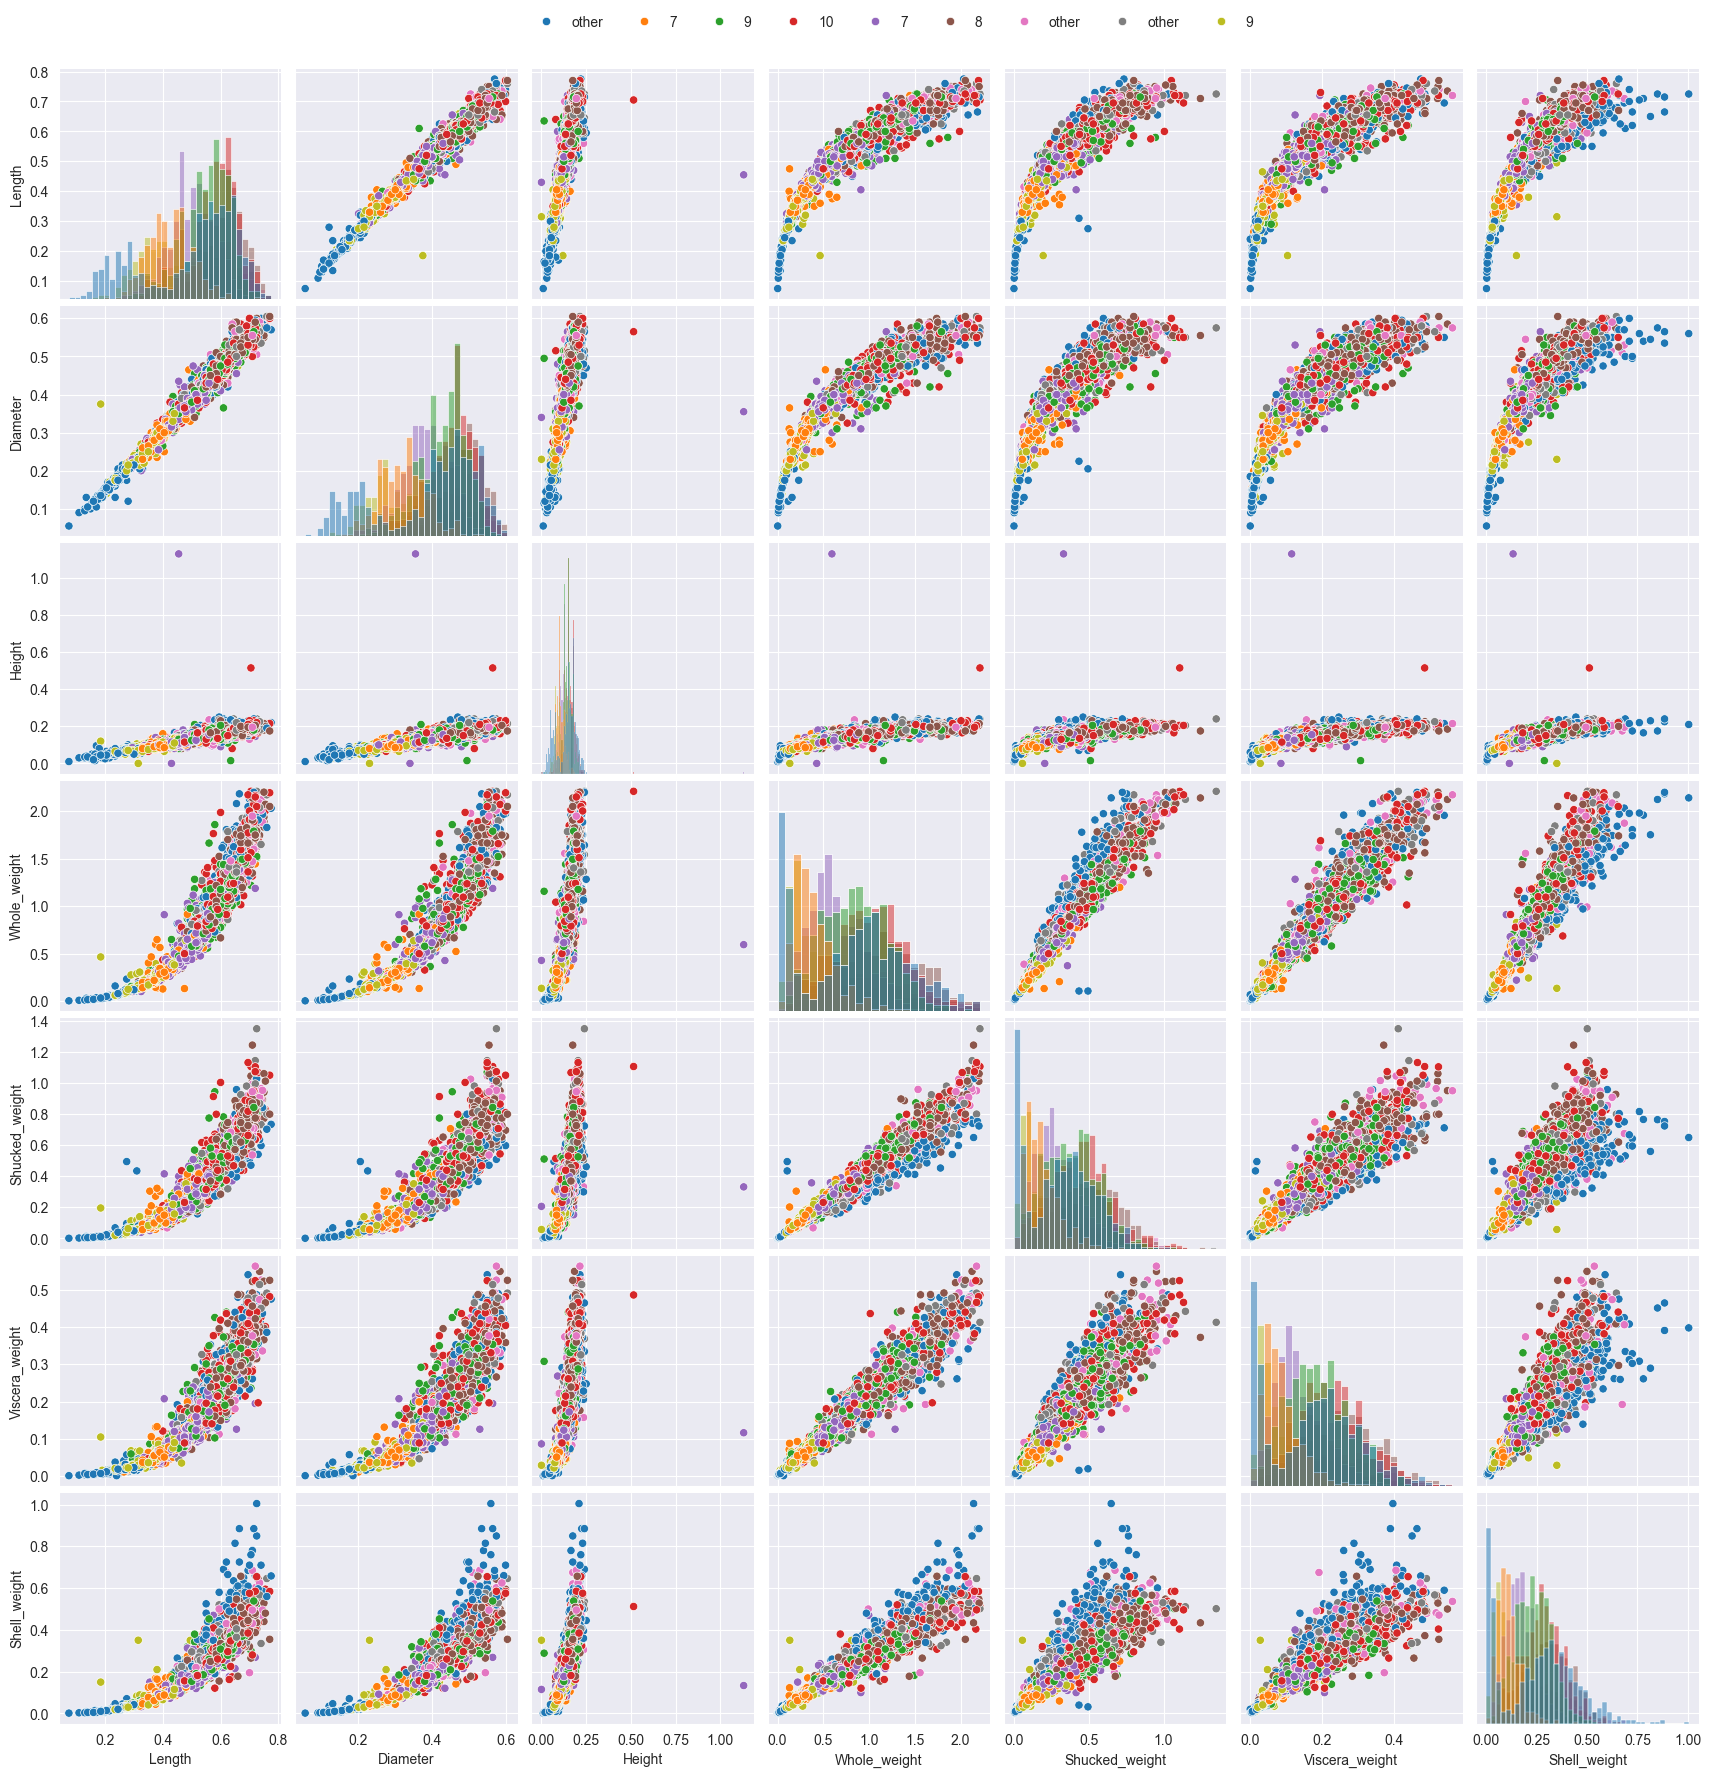

In [28]:
g=sns.pairplot(dataset, hue="Rings", diag_kind="hist")
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=9, title=None)
for t, l in zip(g._legend.texts, dataset['Rings']):
    t.set_text(l)

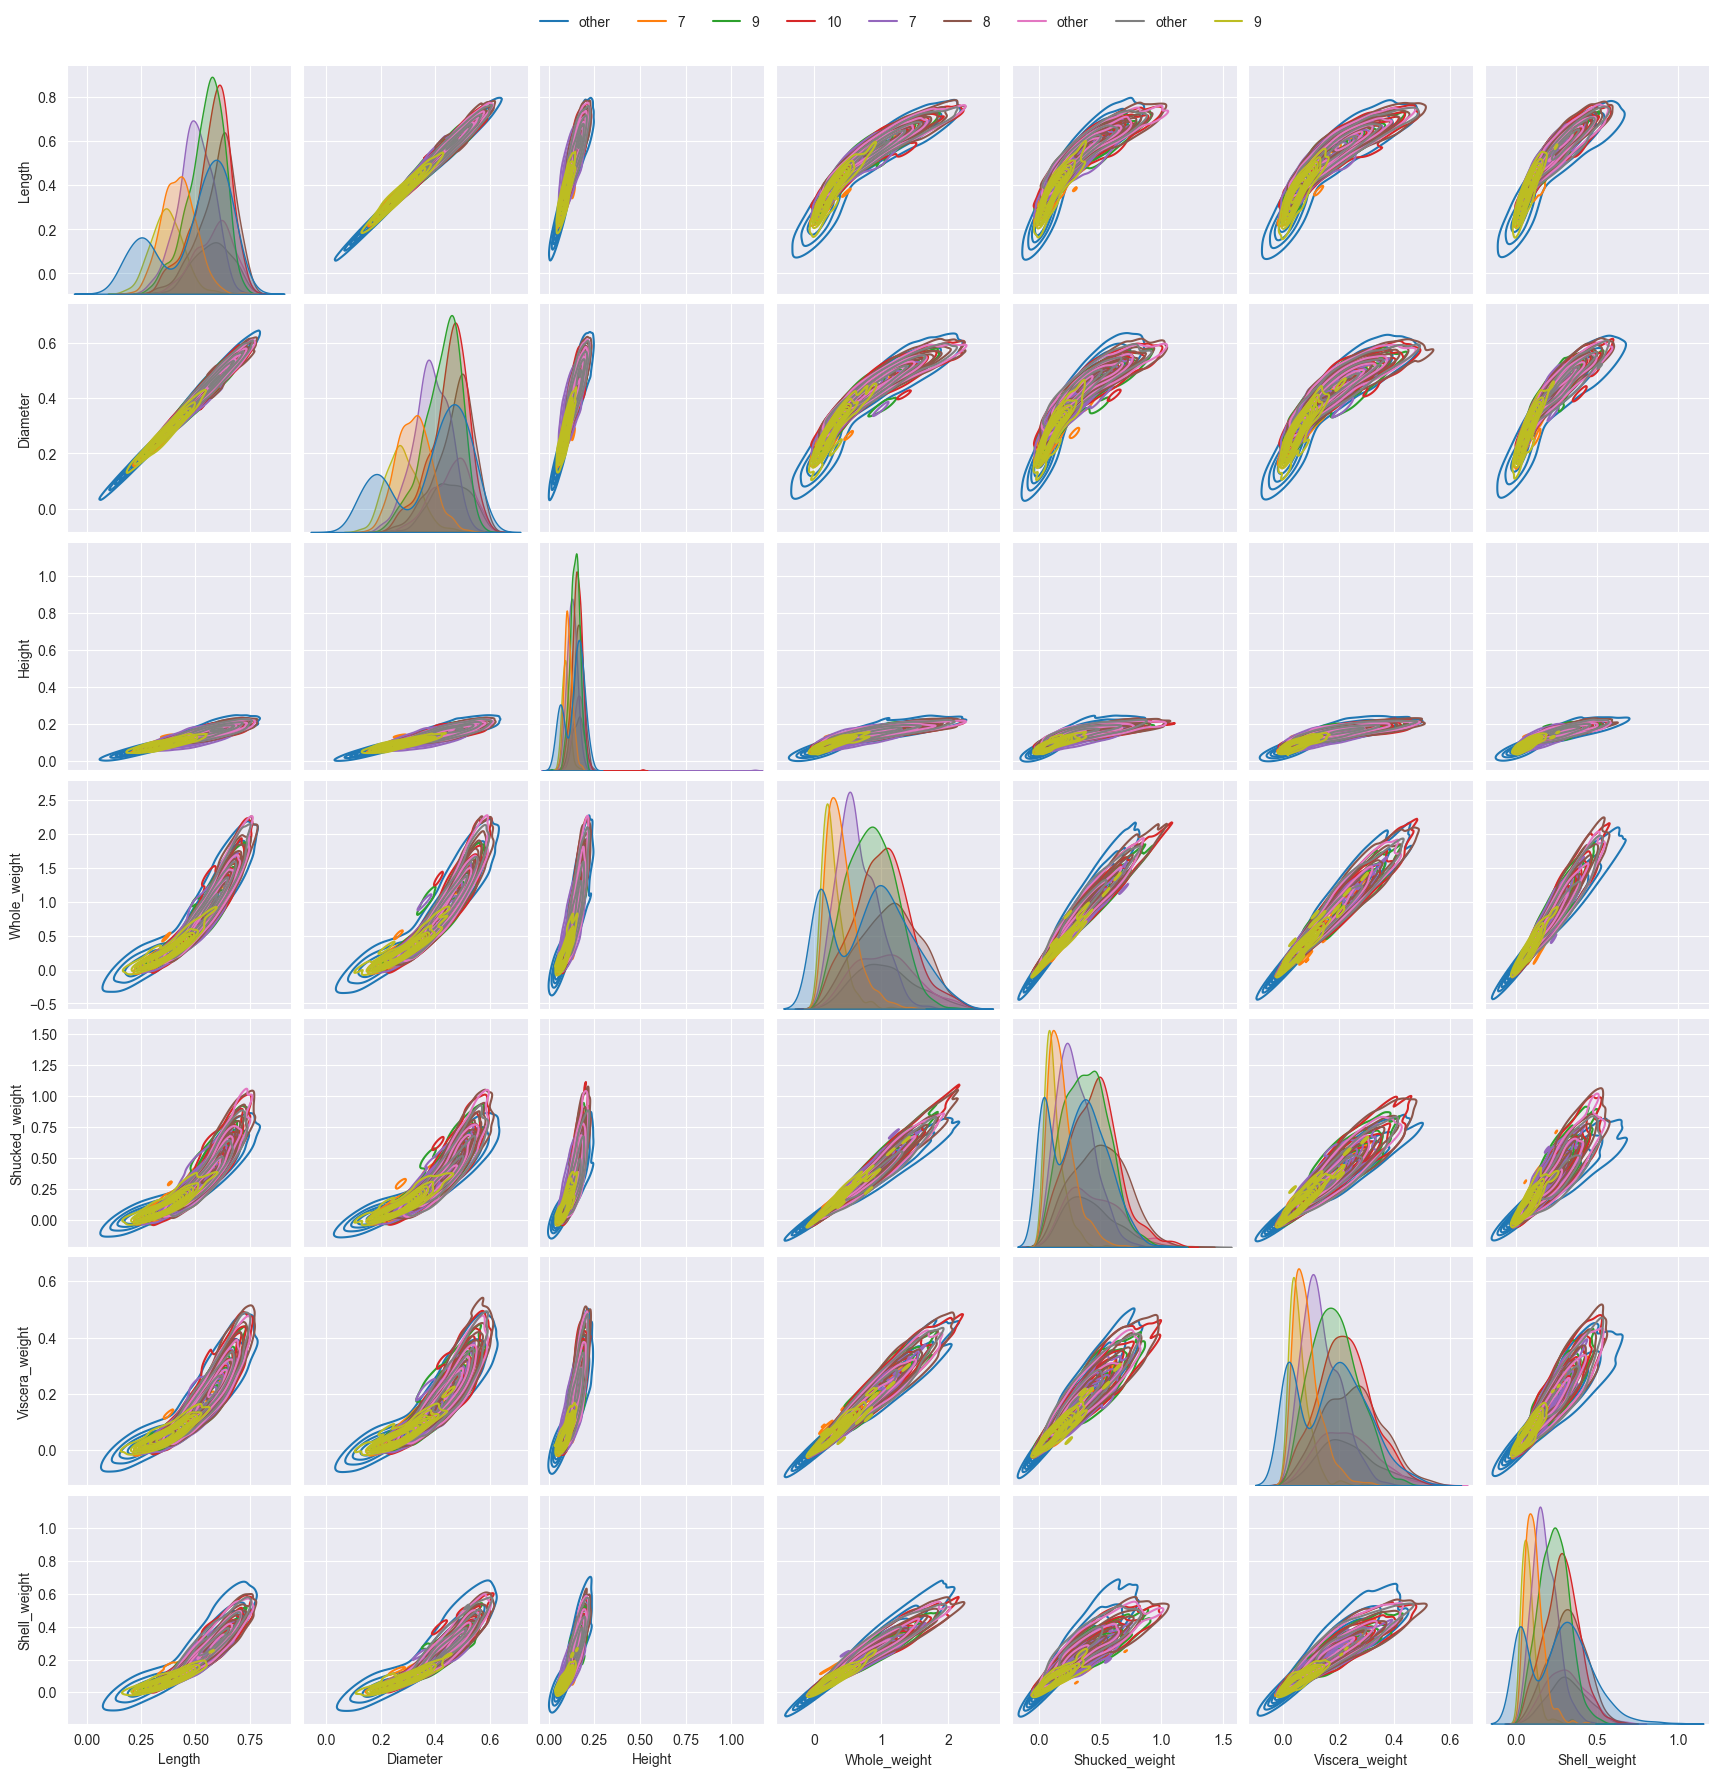

In [29]:
g=sns.pairplot(dataset, hue="Rings",kind="kde")
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=9, title=None)
for t, l in zip(g._legend.texts, dataset['Rings']):
    t.set_text(l)

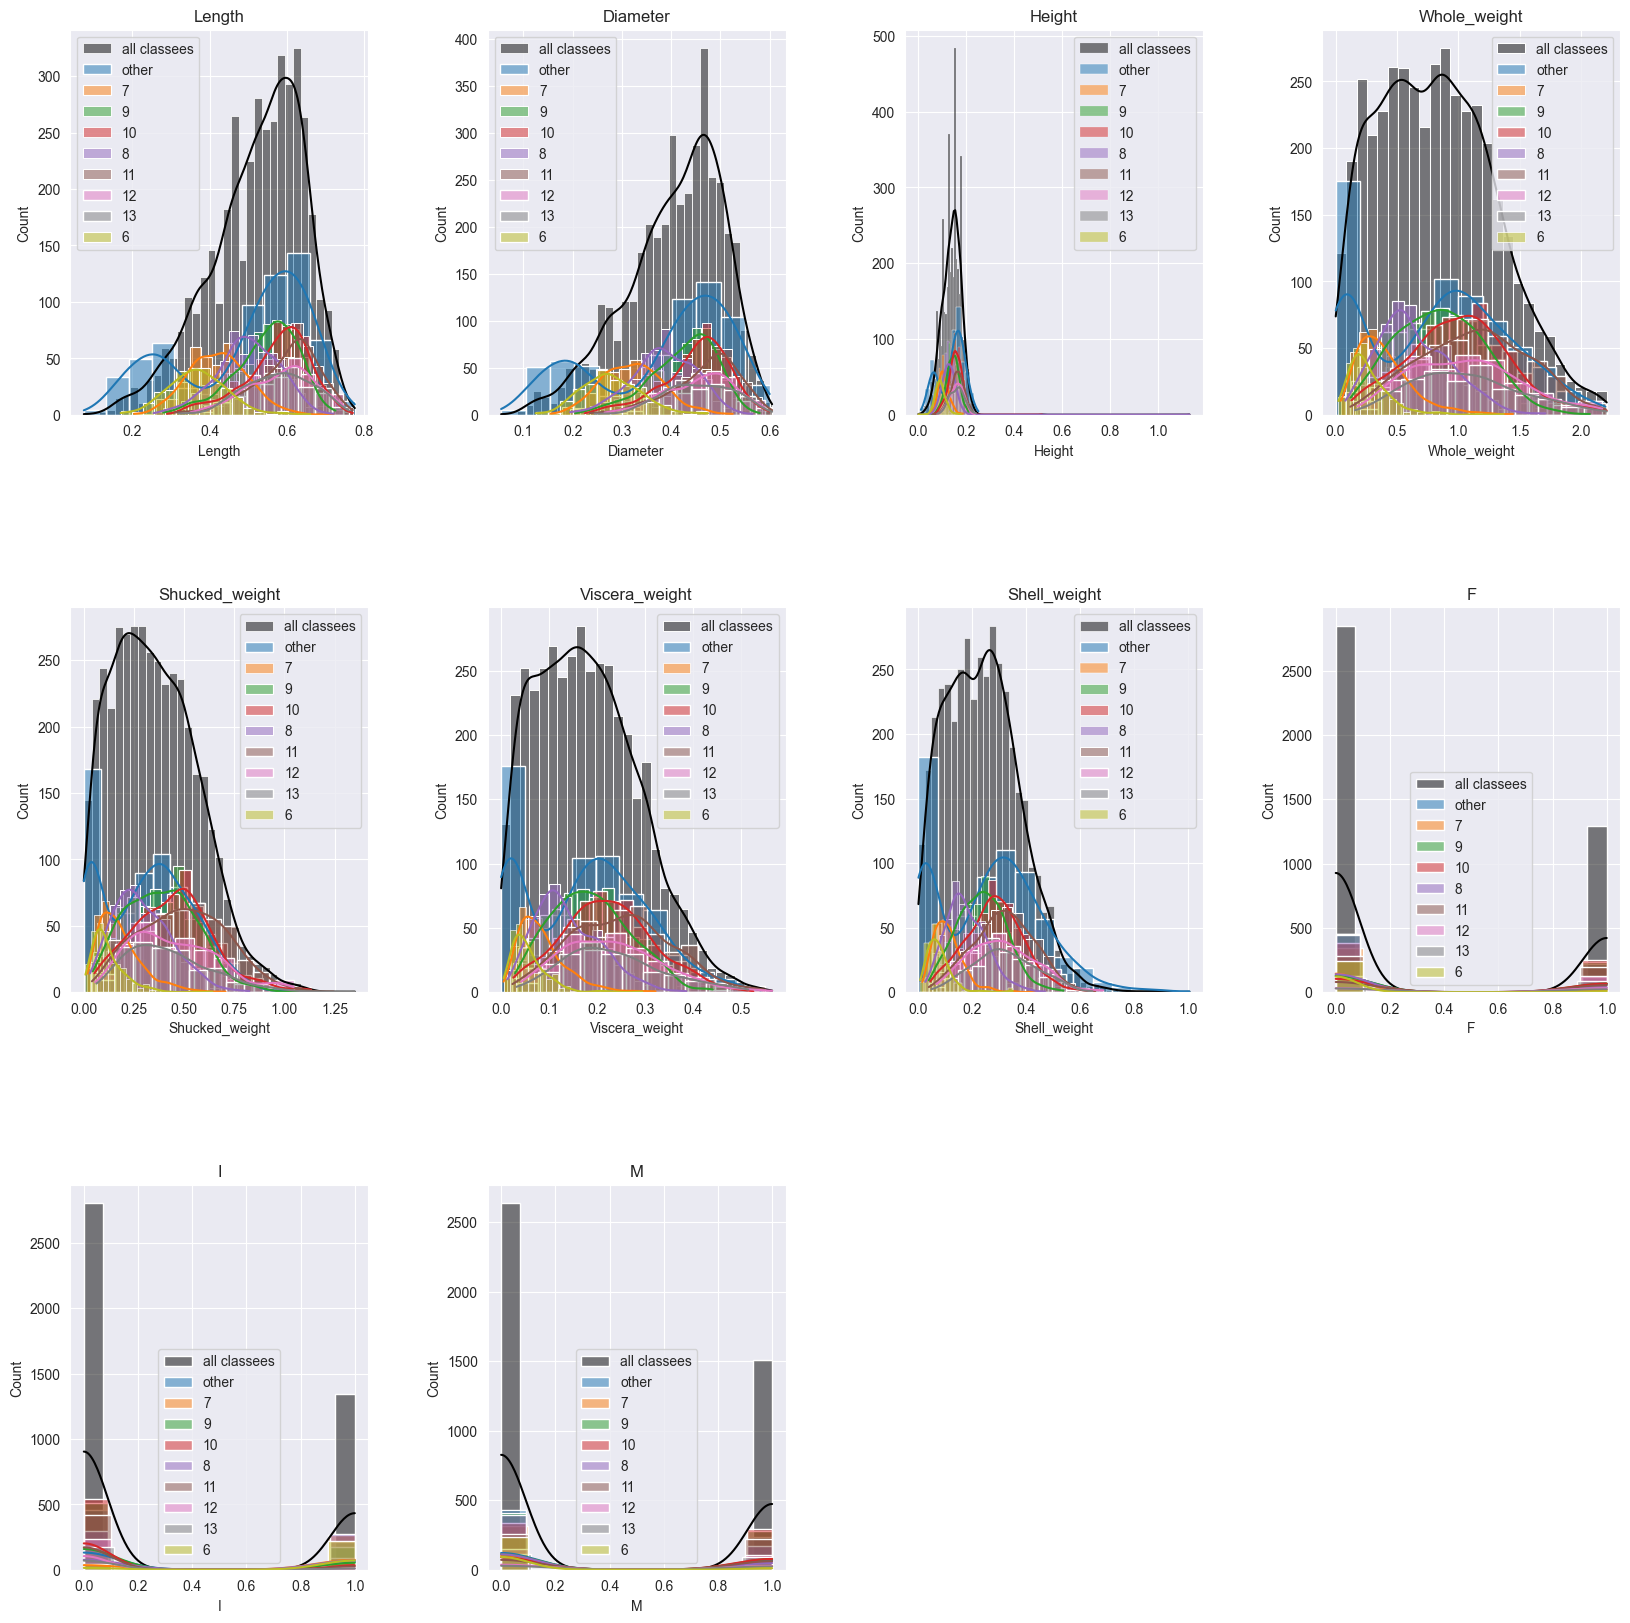

In [51]:
all_features = dataset.drop(columns=['Rings'],axis=1).columns
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4) 
n_features = len(all_features)
for f in range(n_features):
    ax = plt.subplot(3,4,f+1)
    plt.title(all_features[f])
    sns.histplot(dataset[all_features[f]],color='black',label='all classees',kde=True,stat="count") 
    for t in range(len(unique_classes)): # се прикажува хистограм на вредностите на соодветниот атрибут за секоја класа посебно
        sns.histplot(dataset[dataset['Rings'] == unique_classes[t]][all_features[f]], 
                 label=unique_classes[t], kde=True, stat="count")
    plt.legend()
plt.show()

<Axes: >

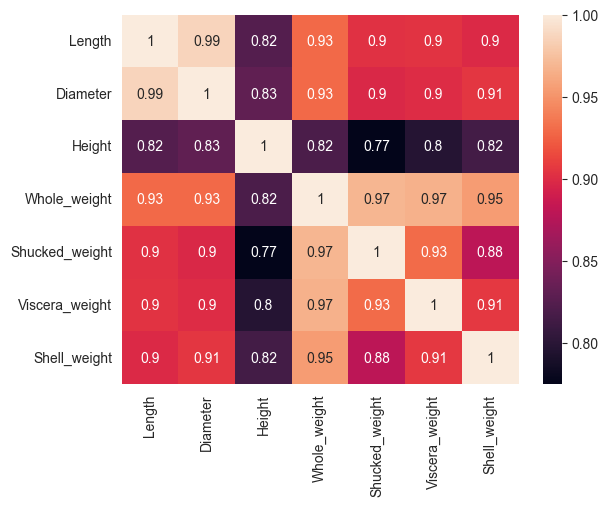

In [30]:
sns.heatmap(dataset[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']].corr(),annot=True)

In [31]:
dataset_tmp = pd.get_dummies(dataset['Sex']).astype(int)
dataset_tmp

F  I  M
0     0  0  1
1     0  0  1
2     1  0  0
3     0  0  1
4     0  1  0
...  .. .. ..
4172  1  0  0
4173  0  0  1
4174  0  0  1
4175  1  0  0
4176  0  0  1

[4147 rows x 3 columns]

In [32]:
dataset = pd.merge(dataset,dataset_tmp,right_index=True,left_index=True)
dataset

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  F  I  M  
0             0.1010        0.1500  other  0  0  1  
1             0.0485        0.0700      7  0  0  1  
2             0.1415        0.2100      9  1  0  0  
3             0.1140        0.1550     10  0  0  1  
4             0.0395        0.0550      7  0  1  0  
...              ...           ...    ... .. .. ..  
4172          0.2390        0.2490     11  1  0  0  
4173          0.2145        0.2605     10  0  0  1  
4174          0.2875        0.3080      9  0  0  1  
4175          0.2610        0.2960     10  1  0  0  
4176          0.3765        0.4950     12  0  0  1  

[4147 rows x 12 columns]

In [33]:
dataset = dataset.drop(columns='Sex',axis=1)
dataset

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings  F  I  M  
0           0.1500  other  0  0  1  
1           0.0700      7  0  0  1  
2           0.2100      9  1  0  0  
3           0.1550     10  0  0  1  
4           0.0550      7  0  1  0  
...            ...    ... .. .. ..  
4172        0.2490     11  1  0  0  
4173        0.2605     10  0  0  1  
4174        0.3080      9  0  0  1  
4175        0.2960     10  1  0  0  
4176        0.4950     12  0  0  1  

[4147 rows x 11 columns]

## Training the models

In [34]:
X,y = dataset.drop(columns='Rings',axis=1),dataset['Rings']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### LDA

In [35]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [36]:
print(f"Priors values in LDA are: {lda_model.priors_}")

Priors values in LDA are: [0.15435635 0.11365692 0.06300874 0.04974374 0.06119988 0.09556828
 0.13898101 0.16671691 0.15676816]


In [37]:
pred = lda_model.predict(X_test)
print(classification_report(y_test,pred,zero_division=0))

              precision    recall  f1-score   support

          10       0.21      0.24      0.23       120
          11       0.31      0.23      0.26       104
          12       0.00      0.00      0.00        48
          13       0.33      0.03      0.05        36
           6       0.30      0.38      0.34        56
           7       0.35      0.34      0.34        74
           8       0.31      0.39      0.35       107
           9       0.27      0.43      0.33       134
       other       0.47      0.36      0.41       151

    accuracy                           0.31       830
   macro avg       0.28      0.27      0.26       830
weighted avg       0.30      0.31      0.29       830



<Axes: >

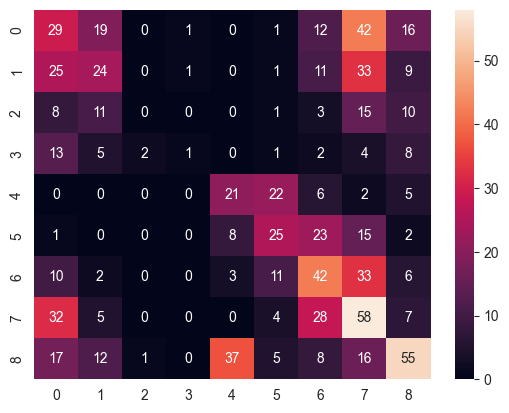

In [38]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

## QDA

In [39]:
qda_model = QuadraticDiscriminantAnalysis(reg_param=0.2)
qda_model.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(reg_param=0.2)

In [40]:
print(f"Priors values in QDA are: {qda_model.priors_}")

Priors values in QDA are: [0.15435635 0.11365692 0.06300874 0.04974374 0.06119988 0.09556828
 0.13898101 0.16671691 0.15676816]


In [41]:
pred = qda_model.predict(X_test)
print(classification_report(y_test,pred,zero_division=0))

              precision    recall  f1-score   support

          10       0.22      0.50      0.30       120
          11       0.33      0.14      0.20       104
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        36
           6       0.26      0.25      0.26        56
           7       0.35      0.62      0.44        74
           8       0.32      0.27      0.29       107
           9       0.23      0.39      0.29       134
       other       0.00      0.00      0.00       151

    accuracy                           0.26       830
   macro avg       0.19      0.24      0.20       830
weighted avg       0.20      0.26      0.21       830



<Axes: >

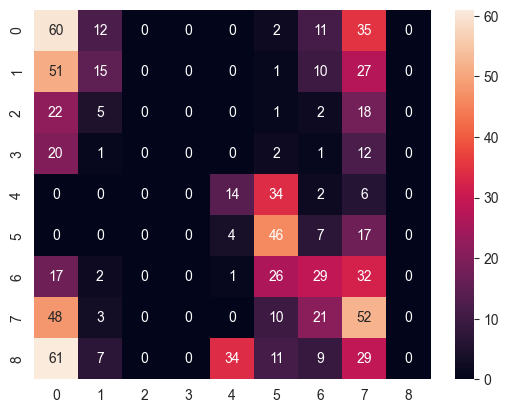

In [42]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

## Naive Bayes

In [43]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [44]:
print(f"Priors values in NBG are: {nb_model.class_prior_}")

Priors values in NBG are: [0.15435635 0.11365692 0.06300874 0.04974374 0.06119988 0.09556828
 0.13898101 0.16671691 0.15676816]


In [45]:
pred = nb_model.predict(X_test)
print(classification_report(y_test,pred,zero_division=0))

              precision    recall  f1-score   support

          10       0.22      0.17      0.20       120
          11       0.24      0.51      0.32       104
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        36
           6       0.31      0.88      0.46        56
           7       0.19      0.28      0.23        74
           8       0.23      0.21      0.22       107
           9       0.24      0.25      0.25       134
       other       1.00      0.01      0.03       151

    accuracy                           0.24       830
   macro avg       0.27      0.26      0.19       830
weighted avg       0.35      0.24      0.19       830



<Axes: >

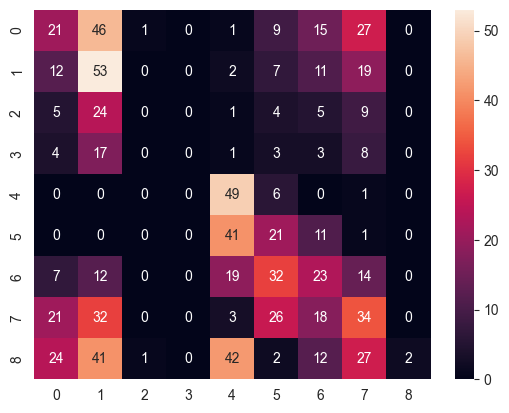

In [46]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

## Заклучок:
Со користење на наивен баесов класификатор заедно со дискриминантните анализа QDA LDA кои работат заедно на ист принцип може да заклучи дека трите модела имаат многу лоши перформанси во предвидување на годината на фамилијата abalone школки од кои најлош модел е  наивен баесов класификатор а најдобар од трите модели е LDA.